<a href="https://www.kaggle.com/code/venkateshkarukuri/graduate-admission-prediction?scriptVersionId=126503183" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Students are often worried about their chances of admission in graduate school. The aim of this machine learning model is to help students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their admission chances in a particular university. This will assist students to know in advance if they have a chance to get accepted.



In [1]:
# DataSet https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?datasetId=14872&sortBy=voteCount

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN, nan, NAN
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")



### Modelling 

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
#Import Dataset 
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Identification of variables and data types

In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# Analysing the basic metrics:



In [7]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


# Checking the Missing value


In [8]:
df.isnull().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Duplicates Check 

In [9]:
df.duplicated().sum()


0

# Drop the Serial number


In [10]:
df.drop(columns=['Serial No.'], inplace=True)

In [11]:
df.shape

(500, 8)

In [12]:
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
df.nunique()


GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [14]:
df['University Rating'].value_counts(ascending=True)


1     34
5     73
4    105
2    126
3    162
Name: University Rating, dtype: int64

In [15]:
# univertsitys with rating 2, 3 and 4 has more applications

In [16]:
df['Research'].value_counts(ascending=True)

0    220
1    280
Name: Research, dtype: int64

In [17]:
#Researchers are high compared to the others

# Relationship between two variables


In [18]:
CGPA = df.groupby(['University Rating']).agg({'CGPA':['mean']})
CGPA.reset_index()


,University Rating,CGPA
,,mean
0,1,7.798529
1,2,8.177778
2,3,8.500123
3,4,8.936667
4,5,9.278082


In [19]:
Toefl = df.groupby(['University Rating']).agg({'TOEFL Score':['mean']})
Toefl.reset_index()


,University Rating,TOEFL Score
,,mean
0,1,100.205882
1,2,103.444444
2,3,106.314815
3,4,110.961905
4,5,113.438356


In [20]:
Gre = df.groupby(['University Rating']).agg({'GRE Score':['mean']})
Gre.reset_index()


,University Rating,GRE Score
,,mean
0,1,304.911765
1,2,309.134921
2,3,315.030864
3,4,323.304762
4,5,327.890411


As the Meas are increases with respect to the Ratings. If the Rating of university is high, the entrance exams scores are also high

# Distribution of the variables of graduate applicants

Text(0.5, 1.0, 'Distribution of the column - GRE Score')

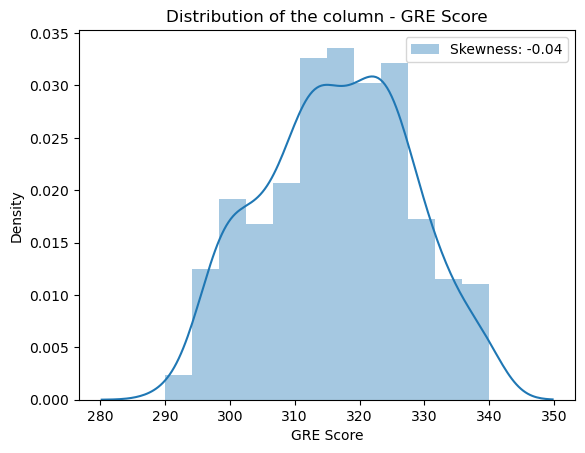

In [21]:
sns.distplot(df['GRE Score'], label = 'Skewness: %.2f'%(df['GRE Score'].skew()))

plt.legend(loc = 'best')
plt.title('Distribution of the column - GRE Score')

Text(0.5, 1.0, 'Distribution of the column - TOEFL Score')

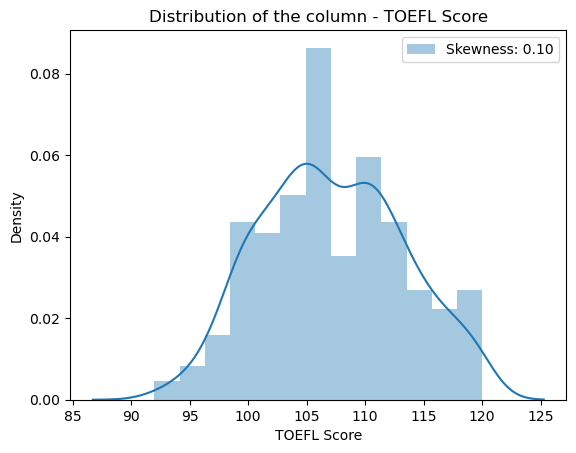

In [22]:
sns.distplot(df['TOEFL Score'], label = 'Skewness: %.2f'%(df['TOEFL Score'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - TOEFL Score')


Text(0.5, 1.0, 'Distribution of the column - University Rating')

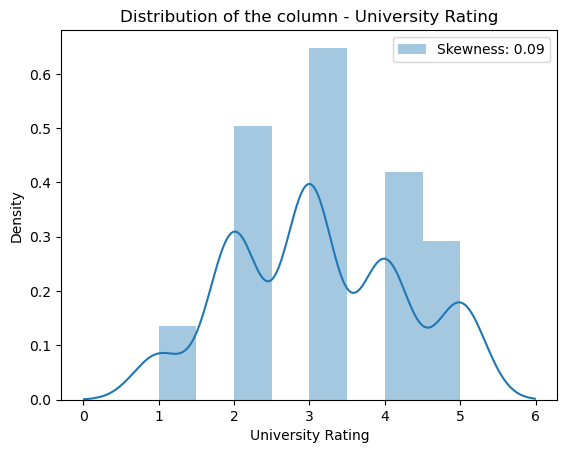

In [23]:
sns.distplot(df['University Rating'], label = 'Skewness: %.2f'%(df['University Rating'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - University Rating')

Text(0.5, 1.0, 'Distribution of the column - SOP')

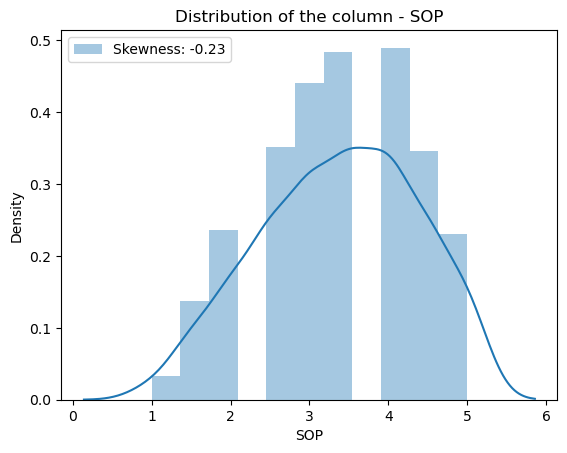

In [24]:
sns.distplot(df['SOP'], label = 'Skewness: %.2f'%(df['SOP'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - SOP')

# Relation between Variables responsible for admission

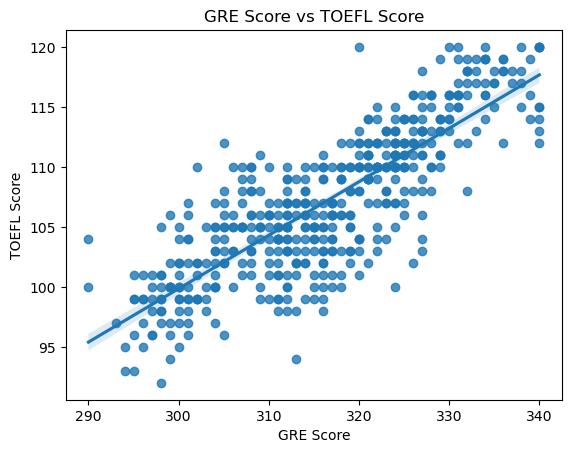

In [25]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

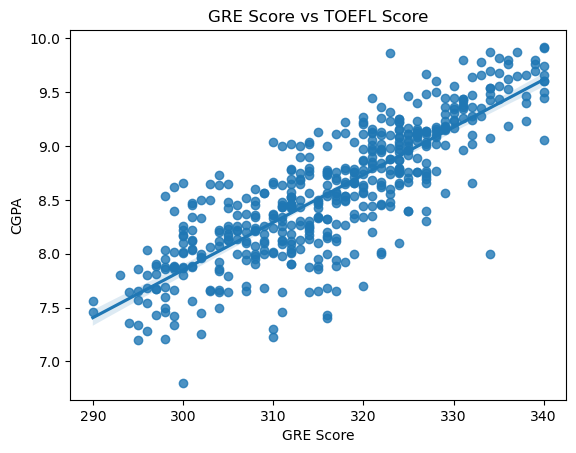

In [26]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

Text(0.5, 1.0, 'GRE Score vs CGPA')

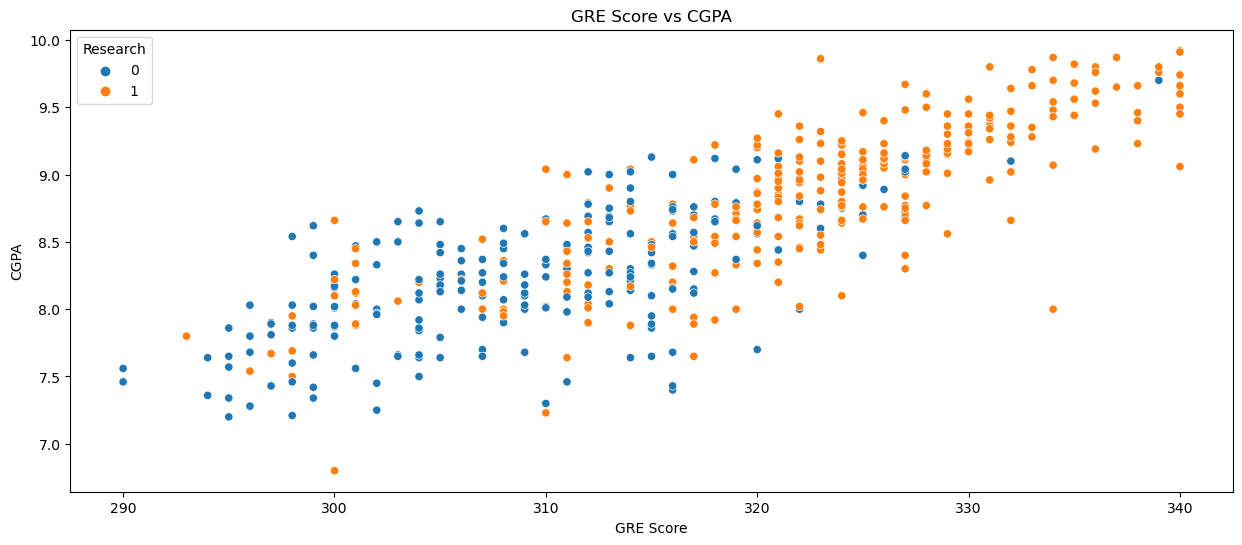

In [27]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x=df['GRE Score'], y=df['CGPA'], hue=df['Research'])
plt.title("GRE Score vs CGPA")

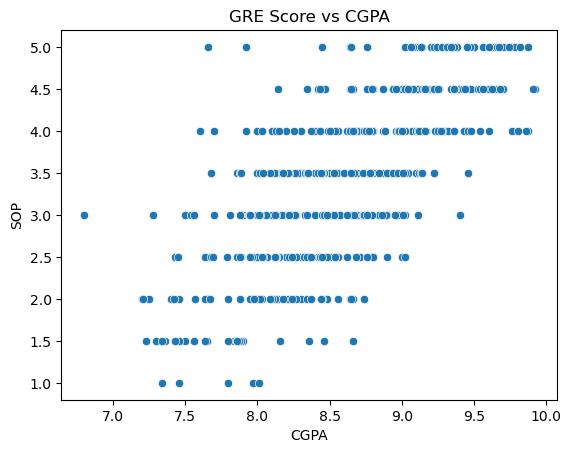

In [28]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

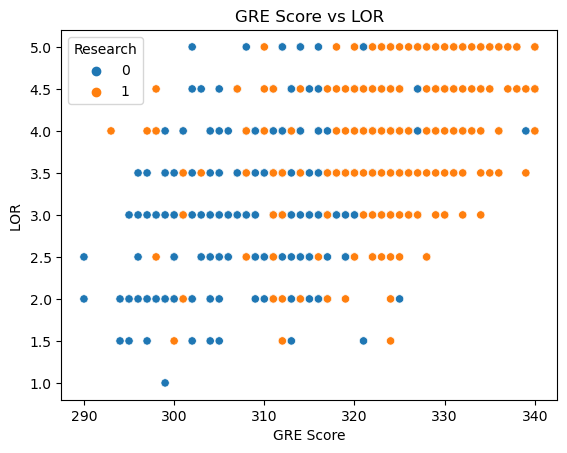

In [29]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs LOR")
plt.show()


# Relation between the input variables and the the Dependent variable

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit '>

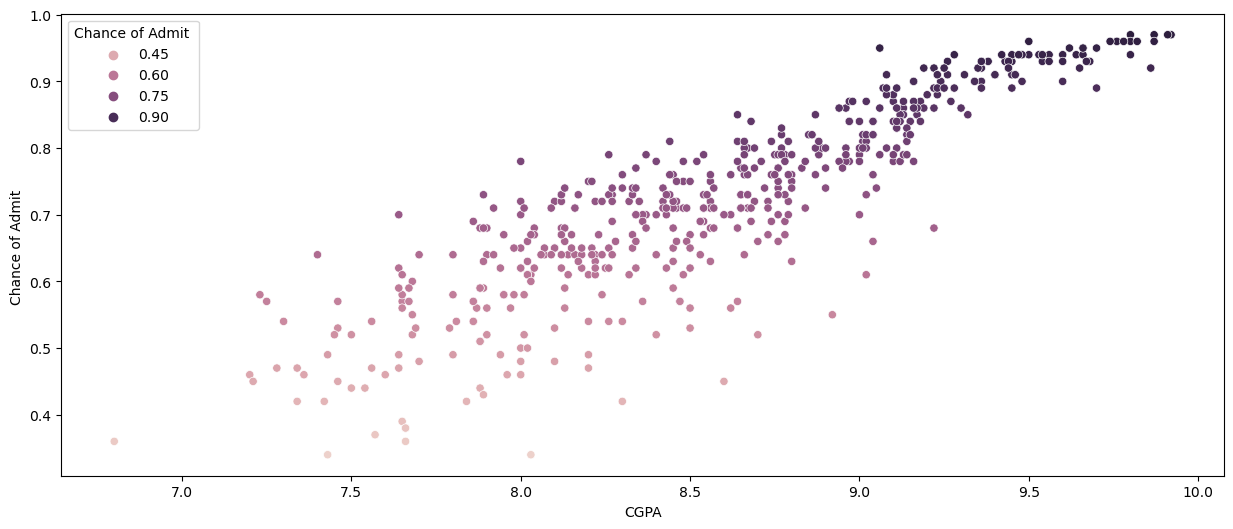

In [30]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x=df['CGPA'], y=df['Chance of Admit '], hue=df['Chance of Admit '])

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit '>

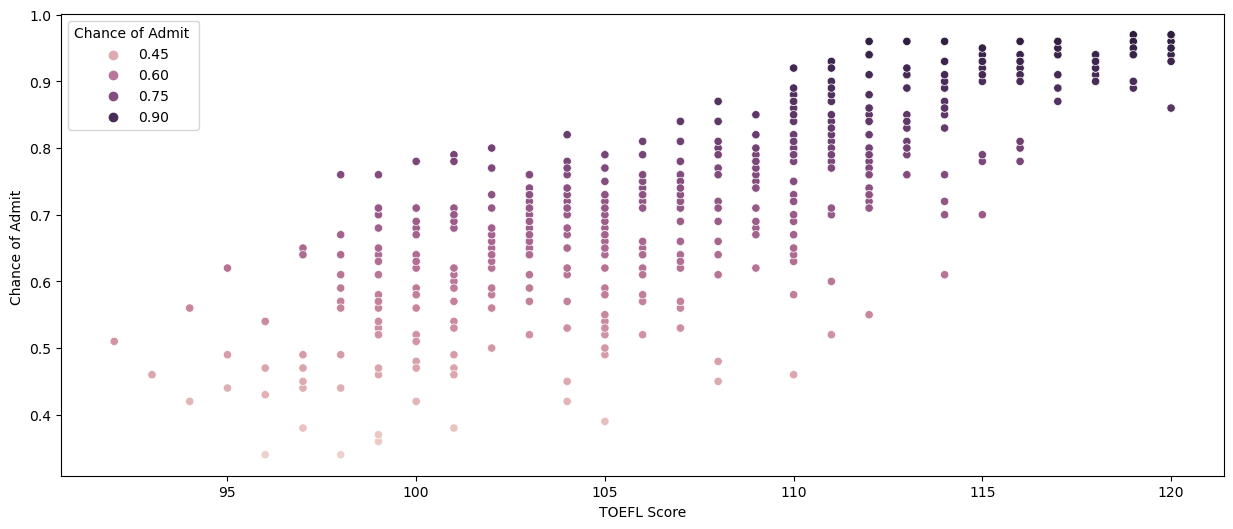

In [31]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x=df['TOEFL Score'], y=df['Chance of Admit '], hue=df['Chance of Admit '])

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

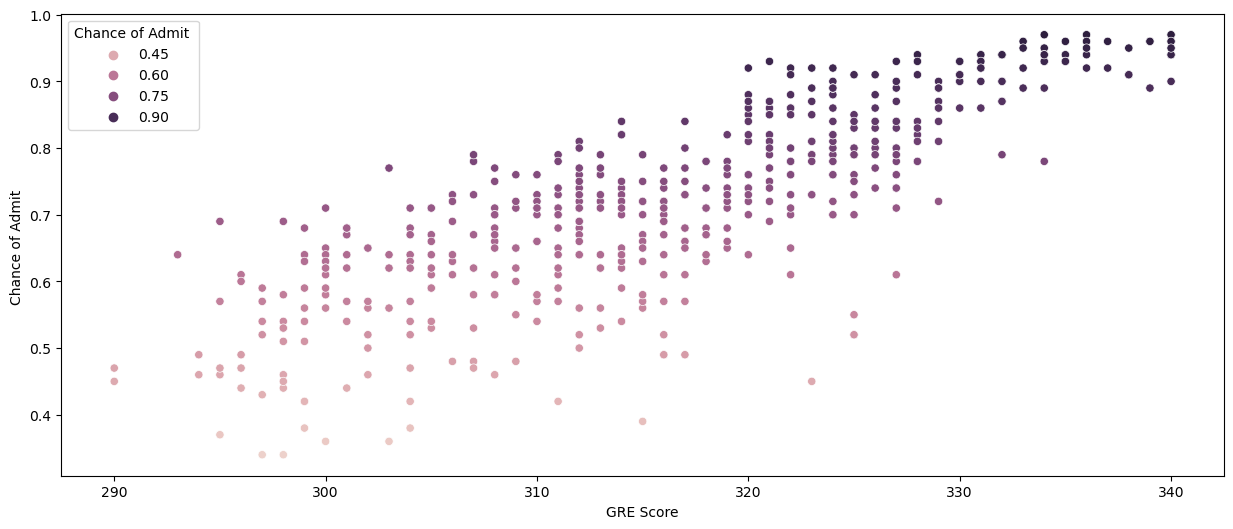

In [32]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x=df['GRE Score'], y=df['Chance of Admit '], hue=df['Chance of Admit '])

The chance of getting admission is completly dependent on the entrance exam scores, the more is the score, the chance of getting admission is high. The more the GRE Score, TOEFL Score, CGPA, the change of getting admited is high. 

# Checking Correlation


<AxesSubplot:>

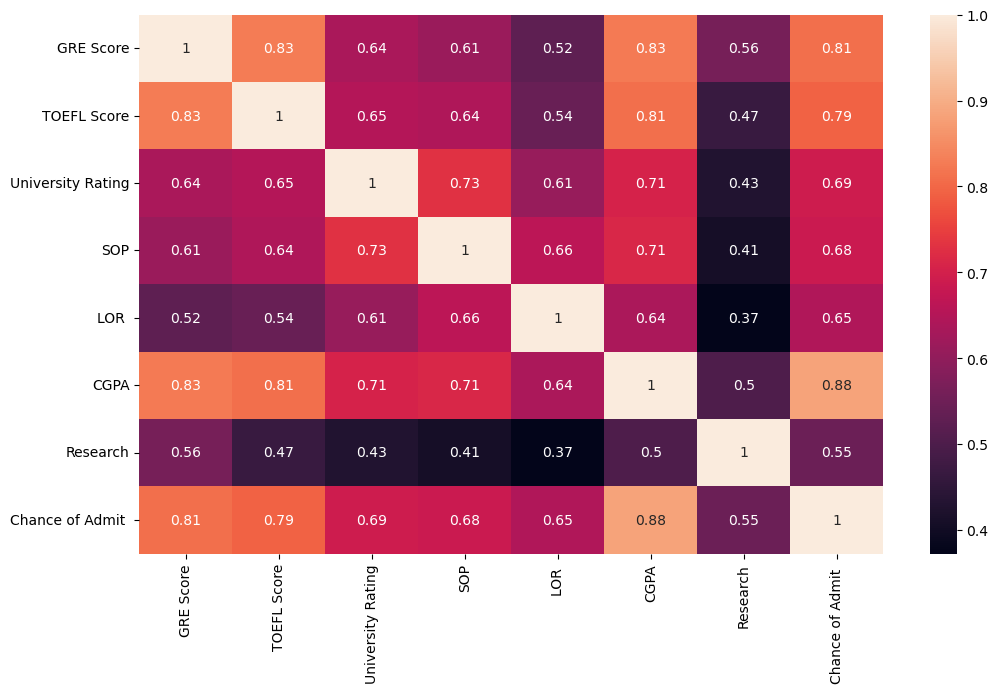

In [33]:
plt.figure(figsize=(12,7))
corr = df.corr()
sns.heatmap(corr,annot=True)

# Detect and remove outliers in numerical variables


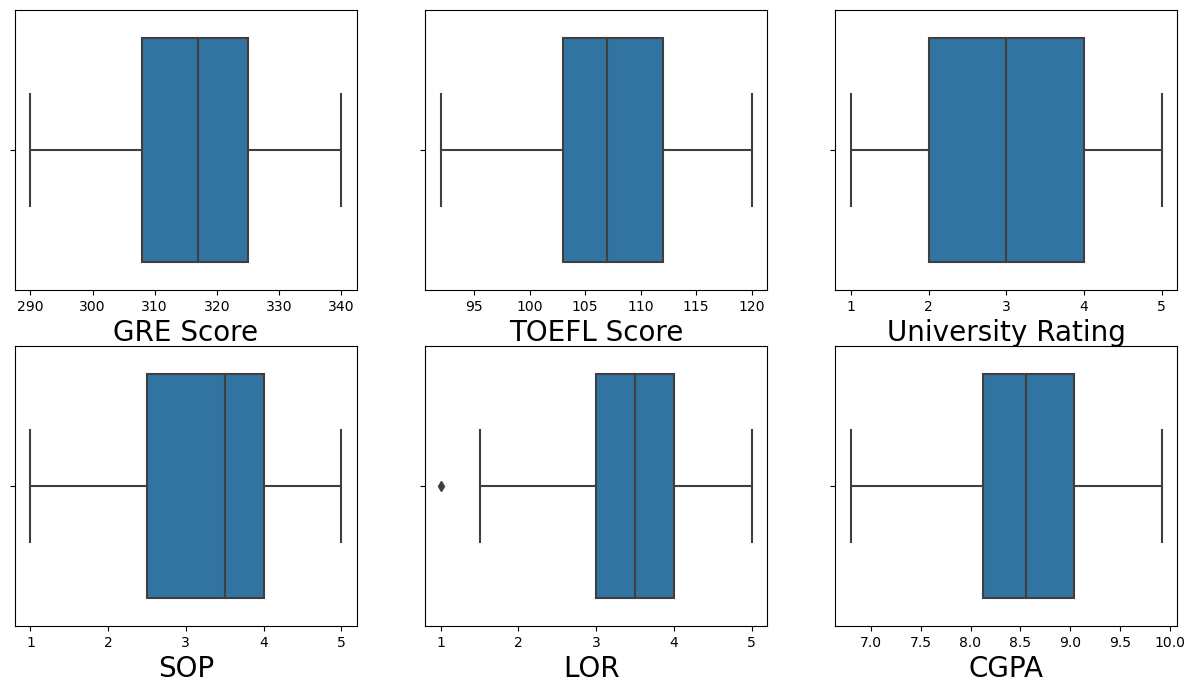

In [34]:
fig, ax = plt.subplots(2,3, figsize=(15, 8))
df=df.select_dtypes(np.number)
for variable, subplot in zip(df.columns, ax.flatten()):
    z = sns.boxplot(x = df[variable], orient = "h",whis=1.5 , ax=subplot) 
    z.set_xlabel(variable, fontsize = 20)  
plt.show()

In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [36]:
#Removing outliers

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [37]:
df.shape

(497, 8)

## Model building

In [38]:
x = df.drop(['Chance of Admit '], axis=1).values
y = df['Chance of Admit '].values

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']
cols = x.columns
x[cols] = sc.fit_transform(x[cols])
x[cols].head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.818719,1.781161,0.769761,1.136549,1.097138,1.777188,0.880341
1,0.660668,-0.043044,0.769761,0.629489,1.097138,0.478836,0.880341
2,-0.051979,-0.540555,-0.107696,-0.384631,0.007672,-0.969326,0.880341
3,0.482506,0.454466,-0.107696,0.122429,-1.081793,0.145925,0.880341
4,-0.230140,-0.706391,-0.985153,-1.398751,-0.537061,-0.619770,-1.135924


# VIF Score

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x_t = x
vif['features'] = x_t.columns
vif['vif'] = [variance_inflation_factor(x_t.values, i) for i in range(x_t.shape[1])]
print(vif)


            features       vif
0          GRE Score  4.402221
1        TOEFL Score  3.838492
2  University Rating  2.600570
3                SOP  2.835667
4               LOR   2.004829
5               CGPA  4.701520
6           Research  1.483072


Vif Score is less than 5 for all the features, so they are good no need to drop any variable

### Split the dataset with training and testing set

In [41]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(xTrain, yTrain)

LinearRegression()

In [43]:
b = lr.intercept_
w = lr.coef_

In [44]:
print(w,b)


[0.02583156 0.00980065 0.00570093 0.00533108 0.01720915 0.07084898
 0.01220589] 0.7222214883818932


In [45]:
lr.score(xTrain, yTrain)


0.8388196689520717

In [46]:
ypred=lr.predict(xTest)
ypred

array([0.66331482, 0.69234209, 0.95367775, 0.94406905, 0.93699046,
       0.64686495, 0.54717695, 0.69116544, 0.56383363, 0.76497947,
       0.77436237, 0.72323336, 0.89279683, 0.55306722, 0.8504715 ,
       0.78774565, 0.82328961, 0.63980272, 0.70142865, 0.5227887 ,
       0.59543417, 0.72587134, 0.61304477, 0.70693756, 0.83859344,
       0.65469122, 0.69152273, 0.50600114, 0.84363492, 0.88664385,
       0.73479138, 0.78949767, 0.67485369, 0.82352238, 0.55939843,
       0.65087308, 0.79828115, 0.80249755, 0.59444252, 0.52567812,
       0.59401546, 0.89813115, 0.5721261 , 0.77919687, 0.76896928,
       0.81016108, 0.91946197, 0.84159191, 0.62069143, 0.70071856,
       0.63124718, 0.87801383, 0.70806051, 0.72526929, 0.78576467,
       0.85461635, 0.52496976, 0.81217782, 0.55344306, 0.78021241,
       0.50709426, 0.69087423, 0.50828735, 0.7566956 , 0.7092427 ,
       0.63782151, 0.73832897, 0.51322582, 0.46718872, 0.76629307,
       0.98526495, 0.78042306, 0.60185588, 0.64868009, 0.87807

In [47]:
#R2 Score Calculation 
from sklearn.metrics import r2_score
r2_score(yTest,ypred)

0.7365670027220517

#### Plotting y_test and y_pred to understand the spread.

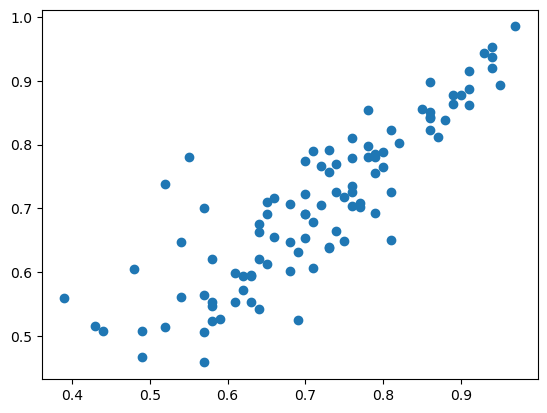

In [48]:
plt.scatter(yTest,ypred)


# Ridge Regression


In [49]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
pipeline.fit(xTrain, yTrain)
y_train_pred = pipeline.predict(xTrain)
y_test_pred = pipeline.predict(xTest)

In [50]:
pipeline.score(xTrain, yTrain)

0.8388144487671512

# Lasso Regression implementation


In [51]:
lasso = Lasso(alpha=0.01)
lasso.fit(xTrain, yTrain)
lasso.score(xTrain, yTrain)

0.830146242309372

# Checking OLS regression using Statsmodule


In [52]:
import statsmodels.api as sm
xTrain = sm.add_constant(xTrain)
model = sm.OLS(yTrain.values, xTrain).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     289.2
Date:                Thu, 20 Apr 2023   Prob (F-statistic):          6.96e-150
Time:                        07:38:12   Log-Likelihood:                 577.28
No. Observations:                 397   AIC:                            -1139.
Df Residuals:                     389   BIC:                            -1107.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7222      0.00

# Root Mean Square Error


In [53]:
import math
MSE = np.square(np.subtract(yTest,ypred)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.0664636223469267


# Mean Absolute Error


In [54]:
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error (MAE)", mean_absolute_error(yTest,ypred))

Mean Absolute Error (MAE) 0.04953567466559205


In [55]:
print("MSE :",mean_squared_error(yTest,ypred))


MSE : 0.004417413095474894


# Mean of Residuals


In [56]:
residuals = yTest-ypred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.008259202741992057


Mean of Residuals should be zero for a good model, here the mean value is very close to Zero, looks the model is Good



# Normality of residuals


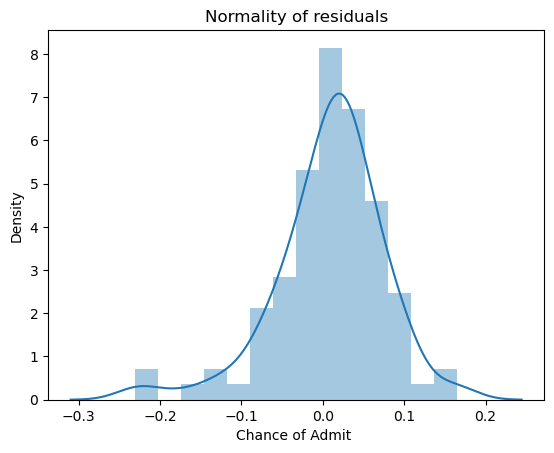

In [57]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of residuals')


# Test for Homoscedasticity

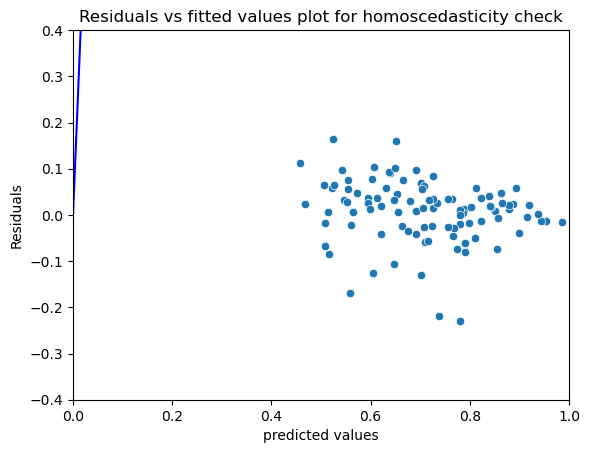

In [58]:
p = sns.scatterplot(x=ypred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot([0,26],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

# Graphical view of Y actual and Y predicted values

<AxesSubplot:xlabel='Chance of Admit ', ylabel='Density'>

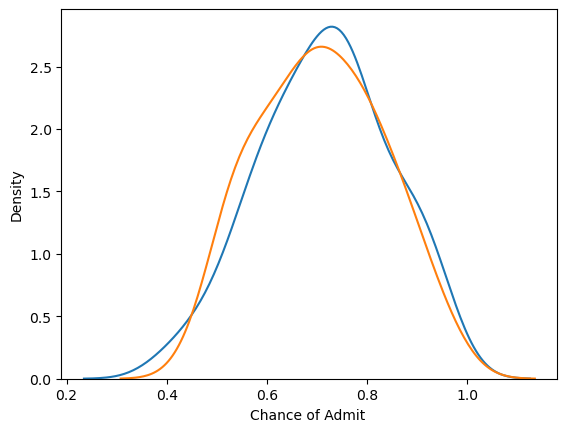

In [59]:
sns.distplot(yTest,hist = False, label ='Actual')
sns.distplot(ypred,hist = False, label ='Predicted')

# Insights

- Input Variables are highly co-related to each other.
- Mostly the scores of sop are from 2.5 to 4.
- Most of the application received from University rating of 2,3 and 4.
- Researcher is more than without researcher.
- Most University between 2 to 4.
- The University Rating is high the chance of admit also high
- We can see GRE and TOEFL both have a linear regression with Chance of Admit.
- There are no any variable with VIF >5.
